# Data Engineering
by [mavisw](https://github.com/mavisw)

## Dataset
[Fashion Product Item](https://www.kaggle.com/paramaggarwal/fashion-product-images-dataset)

* Professional high resolution product images.
* Garment on the dressed models.
* Multiple label attributes describing the product which was manually entered while cataloging. 
* Descriptive text that comments on the product characteristics.

# Data Collection
Describe the sources, parameters, and quantity of raw datasets; collect sufficient and present samples from raw datasets.

In [3]:
# load data
imgs_pd = pd.read_csv(path + 'data/images.csv')
style_pd = pd.read_csv(path + 'data/styles.csv')

## exploration

### images

In [5]:
# product images
imgs_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  44446 non-null  object
 1   link      44446 non-null  object
dtypes: object(2)
memory usage: 694.6+ KB


In [6]:
imgs_pd.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


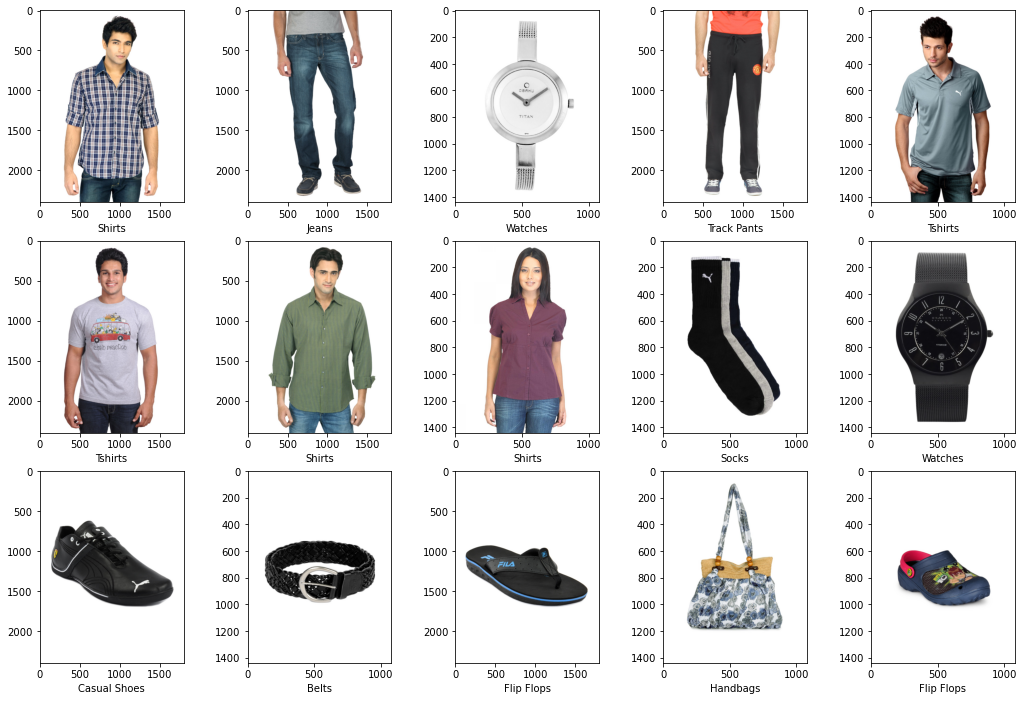

In [7]:
# get url images
def load_url_image(link, target_size=None):
    import requests
    import shutil
    import os
    
    _, ext = os.path.splitext(link)
    
    r = requests.get(link, stream=True)
    with open('temp.' + ext, 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)

    # convert images to array
    img = image.load_img('temp.' + ext, target_size=target_size)
    return image.img_to_array(img)

# visualize product and annotation
# product items
plt.figure(figsize=(18,12))
plt.tight_layout()
for i in range (15):
  # annotation
  anno = style_pd.iloc[:,4][i]
  img_path = imgs_pd['link'][i]
  img = load_url_image(img_path)
  plt.subplot(3,5, i+1)
  # plt.axis('off')
  plt.grid(False)
  plt.imshow(image.array_to_img(img))
  plt.xlabel(anno)

### annotations

In [ ]:
# annotation
style_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
 10  Unnamed: 10         0 non-null      float64
 11  Unnamed: 11         0 non-null      float64
dtypes: float64(3), int64(1), object(8)
memory usage: 4.1+ MB


In [ ]:
style_pd.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN


In [ ]:
# product annotation
# style_pd.describe(include='all')
print(style_pd[style_pd['gender']=='Women'].count())
print()
print(style_pd[style_pd['gender']=='Men'].count())

id                    18632
gender                18632
masterCategory        18632
subCategory           18632
articleType           18632
baseColour            18628
season                18625
year                  18632
usage                 18368
productDisplayName    18628
Unnamed: 10               0
Unnamed: 11               0
dtype: int64

id                    22165
gender                22165
masterCategory        22165
subCategory           22165
articleType           22165
baseColour            22154
season                22157
year                  22164
usage                 22141
productDisplayName    22162
Unnamed: 10               0
Unnamed: 11               0
dtype: int64


In [ ]:
# check if data is balanced
style_pd.groupby(['articleType']).count()

,id,gender,masterCategory,subCategory,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
articleType,,,,,,,,,,,
Accessory Gift Set,111,111,111,111,111,111,111,111,111,0,0
Baby Dolls,16,16,16,16,16,16,16,14,16,0,0
Backpacks,724,724,724,724,724,724,724,724,724,0,0
Bangle,85,85,85,85,85,85,85,85,85,0,0
Basketballs,13,13,13,13,13,13,13,13,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Waistcoat,15,15,15,15,15,15,15,15,15,0,0
Wallets,936,936,936,936,936,936,936,928,936,0,0
Watches,2542,2542,2542,2542,2542,2542,2542,2542,2542,0,0


### image and annotation

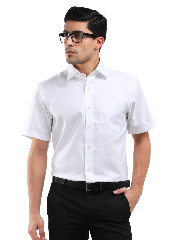

(240, 180, 3)
0    Shirts
Name: articleType, dtype: object


In [ ]:
# img
img_path = imgs_pd['link'][1000]
img = load_url_image(img_path, target_size=(240,180))
# img = load_url_image(img_path)
# img = image.smart_resize(img, (224,224))
display(image.array_to_img(img))
print(img.shape)

# annotation
print(style_pd.articleType[style_pd['id']==15970])

# Pre-processing
Pre-process collected raw datasets based on cleaning and validation tools; present samples from pre-processed datasets.

### drop irrelevant annotations (vertical)

In [ ]:
# drop annotation columns
style_pd = style_pd[['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour']]
style_pd.head()

,gender,masterCategory,subCategory,articleType,baseColour
0,Men,Apparel,Topwear,Shirts,Navy Blue
1,Men,Apparel,Bottomwear,Jeans,Blue
2,Women,Accessories,Watches,Watches,Silver
3,Men,Apparel,Bottomwear,Track Pants,Black
4,Men,Apparel,Topwear,Tshirts,Grey


In [ ]:
link_pd = imgs_pd.drop(['filename'], axis=1)

### join tables

In [ ]:
# join img links and annotations
data_df = style_pd
data_df['link'] = link_pd['link']

In [ ]:
data_df.head()

,gender,masterCategory,subCategory,articleType,baseColour,link
0,Men,Apparel,Topwear,Shirts,Navy Blue,http://assets.myntassets.com/v1/images/style/p...
1,Men,Apparel,Bottomwear,Jeans,Blue,http://assets.myntassets.com/v1/images/style/p...
2,Women,Accessories,Watches,Watches,Silver,http://assets.myntassets.com/v1/images/style/p...
3,Men,Apparel,Bottomwear,Track Pants,Black,http://assets.myntassets.com/v1/images/style/p...
4,Men,Apparel,Topwear,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...


### filter fashion product items (horizontal)

In [ ]:
# filter 'Apparel only'
garment_df = data_df[data_df['masterCategory']=='Apparel']
garment_df.head()

,gender,masterCategory,subCategory,articleType,baseColour,link
0,Men,Apparel,Topwear,Shirts,Navy Blue,http://assets.myntassets.com/v1/images/style/p...
1,Men,Apparel,Bottomwear,Jeans,Blue,http://assets.myntassets.com/v1/images/style/p...
3,Men,Apparel,Bottomwear,Track Pants,Black,http://assets.myntassets.com/v1/images/style/p...
4,Men,Apparel,Topwear,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...
5,Men,Apparel,Topwear,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
# drop 'masterCategory'
garment_df = garment_df.drop(['masterCategory'], axis=1)
garment_df.head()

,gender,subCategory,articleType,baseColour,link
0,Men,Topwear,Shirts,Navy Blue,http://assets.myntassets.com/v1/images/style/p...
1,Men,Bottomwear,Jeans,Blue,http://assets.myntassets.com/v1/images/style/p...
3,Men,Bottomwear,Track Pants,Black,http://assets.myntassets.com/v1/images/style/p...
4,Men,Topwear,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...
5,Men,Topwear,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
garment_df.rename({'subCategory': 'category', 'articleType': 'type', 'baseColour':'color'}, axis=1, inplace=True)
garment_df.head()

,gender,category,type,color,link
0,Men,Topwear,Shirts,Navy Blue,http://assets.myntassets.com/v1/images/style/p...
1,Men,Bottomwear,Jeans,Blue,http://assets.myntassets.com/v1/images/style/p...
3,Men,Bottomwear,Track Pants,Black,http://assets.myntassets.com/v1/images/style/p...
4,Men,Topwear,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...
5,Men,Topwear,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
garment_df.groupby(["category"]).count()

,gender,type,color,link
category,,,,
Apparel Set,106,106,106,106
Bottomwear,2694,2694,2688,2694
Dress,478,478,478,478
Innerwear,1808,1808,1808,1808
Loungewear and Nightwear,470,470,470,470
Saree,427,427,427,427
Socks,12,12,12,12
Topwear,15405,15405,15405,15405


#### drop rows

In [ ]:
# set category as index
data_with_index = garment_df.set_index("category")
data_with_index

,gender,type,color,link
category,,,,
Topwear,Men,Shirts,Navy Blue,http://assets.myntassets.com/v1/images/style/p...
Bottomwear,Men,Jeans,Blue,http://assets.myntassets.com/v1/images/style/p...
Bottomwear,Men,Track Pants,Black,http://assets.myntassets.com/v1/images/style/p...
Topwear,Men,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...
Topwear,Men,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...
...,...,...,...,...
Topwear,Men,Tshirts,Black,http://assets.myntassets.com/v1/images/style/p...
Topwear,Men,Tshirts,Blue,http://assets.myntassets.com/v1/images/style/p...
Topwear,Women,Tshirts,Peach,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
# filter category
data_with_index = data_with_index.drop(["Apparel Set", "Innerwear", "Loungewear and Nightwear", "Saree","Socks"], axis=0)

In [ ]:
data_with_index.shape

(18577, 4)

In [ ]:
# garment_df[garment_df['category']=='Bottomwear']
# data_with_index.groupby(["type"]).count()
data_with_index.groupby(["category"]).count()

,gender,type,color,link
category,,,,
Bottomwear,2694,2694,2688,2694
Dress,478,478,478,478
Topwear,15405,15405,15405,15405


In [ ]:
# drop #7 cloth
data_with_index = data_with_index.reset_index()
data_with_index = data_with_index.drop([7])
data_with_index = data_with_index.set_index('category')
data_with_index

,gender,type,color,link
category,,,,
Topwear,Men,Shirts,Navy Blue,http://assets.myntassets.com/v1/images/style/p...
Bottomwear,Men,Jeans,Blue,http://assets.myntassets.com/v1/images/style/p...
Bottomwear,Men,Track Pants,Black,http://assets.myntassets.com/v1/images/style/p...
Topwear,Men,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...
Topwear,Men,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...
...,...,...,...,...
Topwear,Men,Tshirts,Black,http://assets.myntassets.com/v1/images/style/p...
Topwear,Men,Tshirts,Blue,http://assets.myntassets.com/v1/images/style/p...
Topwear,Women,Tshirts,Peach,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
# path of img
data_with_index['link'][0]


'http://assets.myntassets.com/v1/images/style/properties/7a5b82d1372a7a5c6de67ae7a314fd91_images.jpg'

### [visualize data](https://statsmaths.github.io/stat289-f18/solutions/tutorial28-keras-images.html)

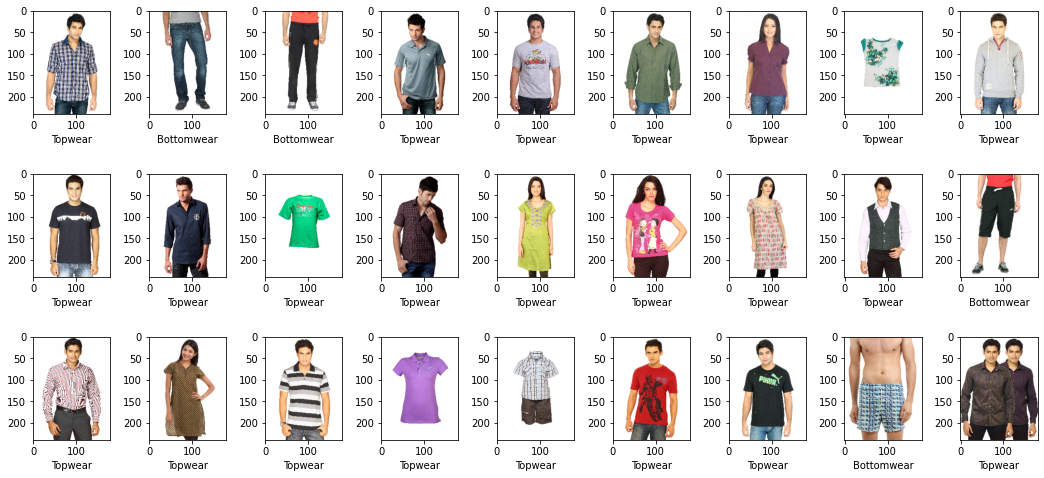

In [ ]:
# get url images
def load_url_image(link, target_size=None):
    import requests
    import shutil
    import os
    
    _, ext = os.path.splitext(link)
    
    r = requests.get(link, stream=True)
    with open('temp.' + ext, 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)

    # convert images to array
    img = image.load_img('temp.' + ext, target_size=target_size)
    return image.img_to_array(img)


# product items
plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
for i in range (27):
  # annotation and img path
  anno = data_with_index.index[i]
  img_path = data_with_index['link'][i]

  img = load_url_image(img_path,(240,180))
  plt.subplot(3,9, i+1)
  # plt.axis('off')
  plt.grid(False)
  plt.imshow(image.array_to_img(img))
  plt.xlabel(anno)

# Data Transformation
Transform pre-processed datasets to desired formats based on tools and scripts; present samples from transformed datasets.

load processed CSV from garment.csv
<!-- need to manulally separate model and cloth -->
* resize
* image to array
* Image data generator
* .flow pair
* save sample 

* to categorical (1-hot encoder)

### image vectorization

* resize image
* convert img to numpy
* normalization

In [ ]:
# img-to-array

# get url images
def load_url_image(link, target_size=None):
    import requests
    import shutil
    import os
    _, ext = os.path.splitext(link)
    r = requests.get(link, stream=True)
    
    with open('temp.' + ext, 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)
    # convert images to array
    img = image.load_img('temp.' + ext, target_size=target_size)
    return image.img_to_array(img)

In [ ]:
new_data = data_df
new_data

,category,gender,type,color,link
0,Topwear,Men,Shirts,Navy Blue,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1,Bottomwear,Men,Jeans,Blue,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,Bottomwear,Men,Track Pants,Black,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,Topwear,Men,Tshirts,Grey,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,Topwear,Men,Tshirts,Grey,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
...,...,...,...,...,...
18571,Topwear,Men,Tshirts,Black,http://assets.myntassets.com/v1/images/style/p...
18572,Topwear,Men,Tshirts,Blue,http://assets.myntassets.com/v1/images/style/p...
18573,Topwear,Women,Tshirts,Peach,http://assets.myntassets.com/v1/images/style/p...
18574,Topwear,Women,Tops,Blue,http://assets.myntassets.com/v1/images/style/p...


In [ ]:
new_data[0:5]

,category,gender,type,color,link
0,Topwear,Men,Shirts,Navy Blue,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1,Bottomwear,Men,Jeans,Blue,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,Bottomwear,Men,Track Pants,Black,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,Topwear,Men,Tshirts,Grey,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,Topwear,Men,Tshirts,Grey,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [ ]:
# categorical variable conversion
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
new_data['category'] = encoder.fit_transform(new_data.iloc[:,0])
new_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,category,image
0,1,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1,0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,1,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,1,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


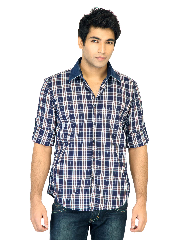

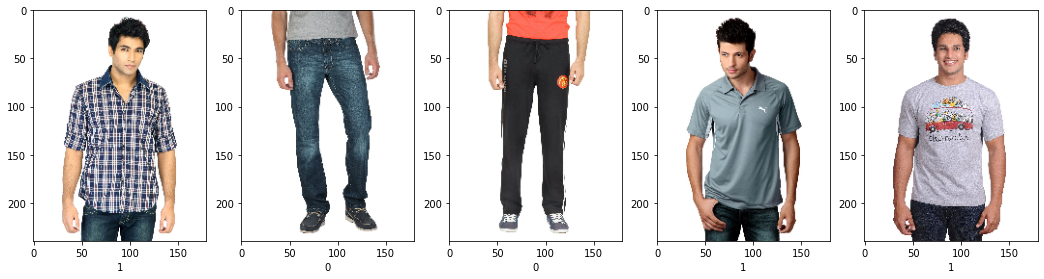

In [ ]:
df = new_data
plt.figure(figsize=(18,12))
plt.tight_layout()
for i in range(5):
  # annotation
  anno = df['category'][i]
  plt.subplot(1,5, i+1)
  # plt.axis('off')
  plt.grid(False)
  plt.imshow(image.array_to_img(df['image'][i]))
  plt.xlabel(anno)

display(image.array_to_img(df['image'][0]))

In [ ]:
# random binary gen

randi_arr = np.random.randint(0, 2, 18576)
# randi_arr.reshape([18576,1])
randi_arr.shape

(18576,)

In [ ]:
data = pd.read_csv(path + 'data/garment.csv')
data['garmentOnly'] = randi_arr
data

,category,gender,type,color,link,garmentOnly
0,Topwear,Men,Shirts,Navy Blue,http://assets.myntassets.com/v1/images/style/p...,1
1,Bottomwear,Men,Jeans,Blue,http://assets.myntassets.com/v1/images/style/p...,1
2,Bottomwear,Men,Track Pants,Black,http://assets.myntassets.com/v1/images/style/p...,1
3,Topwear,Men,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...,0
4,Topwear,Men,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...,0
...,...,...,...,...,...,...
18571,Topwear,Men,Tshirts,Black,http://assets.myntassets.com/v1/images/style/p...,0
18572,Topwear,Men,Tshirts,Blue,http://assets.myntassets.com/v1/images/style/p...,1
18573,Topwear,Women,Tshirts,Peach,http://assets.myntassets.com/v1/images/style/p...,0
18574,Topwear,Women,Tops,Blue,http://assets.myntassets.com/v1/images/style/p...,0


In [ ]:
data = pd.read_csv(path + 'data/garment.csv', usecols = ['category','link'])

# data = data[['category','link','garmentOnly']]
data.head()

,category,link
0,Topwear,http://assets.myntassets.com/v1/images/style/p...
1,Bottomwear,http://assets.myntassets.com/v1/images/style/p...
2,Bottomwear,http://assets.myntassets.com/v1/images/style/p...
3,Topwear,http://assets.myntassets.com/v1/images/style/p...
4,Topwear,http://assets.myntassets.com/v1/images/style/p...


# Data Preparation
Prepare training, validation, and test datasets from transformed datasets; present samples from prepared datasets.

* reference person
* garment

## ImageDataGenerator

In [ ]:
train_datagen = image.ImageDataGenerator(rescale=1.0/255.0,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         rotation_range=45,
                                         channel_shift_range=0.2,
                                         horizontal_flip=True)
test_datagen = image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
valid_generator = test_datagen.flow( x_val, y_val, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img_path = path + '/images/'

# generate 1st random batch and save to folder
sample_imgs = next(train_datagen.flow(x_test, batch_size=64, shuffle=True,
                             save_to_dir= img_path, save_prefix='test_sample', save_format='jpeg'))

display(image.array_to_img(sample_imgs[0]))
print(sample_imgs.shape)

In [ ]:
# 5000 test, 13576 
(18576-5000)*0.3

4072.7999999999997

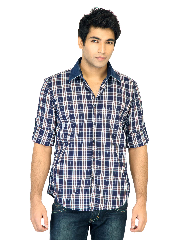

In [ ]:
display(image.array_to_img(new_data['image'][0]))

In [ ]:
data = []
for i in range(len(df)):
   = df['image'][i]
  y = df['category'][i]
  sample = (X,y)
  data.append(sample)

In [ ]:
df.shape

(5, 2)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df['image']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
y[0]

1

# Data Statistics

In [ ]:
# random binary gen

randi_arr = np.random.randint(0, 2, 18576)
# randi_arr.reshape([18576,1])
randi_arr.shape

data = pd.read_csv(path + 'data/garment.csv')
data['garmentOnly'] = randi_arr
data

,category,gender,type,color,link,garmentOnly
0,Topwear,Men,Shirts,Navy Blue,http://assets.myntassets.com/v1/images/style/p...,0
1,Bottomwear,Men,Jeans,Blue,http://assets.myntassets.com/v1/images/style/p...,0
2,Bottomwear,Men,Track Pants,Black,http://assets.myntassets.com/v1/images/style/p...,0
3,Topwear,Men,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...,0
4,Topwear,Men,Tshirts,Grey,http://assets.myntassets.com/v1/images/style/p...,0
...,...,...,...,...,...,...
18571,Topwear,Men,Tshirts,Black,http://assets.myntassets.com/v1/images/style/p...,0
18572,Topwear,Men,Tshirts,Blue,http://assets.myntassets.com/v1/images/style/p...,0
18573,Topwear,Women,Tshirts,Peach,http://assets.myntassets.com/v1/images/style/p...,0
18574,Topwear,Women,Tops,Blue,http://assets.myntassets.com/v1/images/style/p...,1


In [ ]:
a = [4,5,6]
b = [i for i in a if i >5 ]
b

[6]

In [ ]:
aa = data.drop(['category','gender','color','garmentOnly'],axis=1)
aa = aa.groupby('type').count()
aa = aa.loc[(aa['link'] >= 280)]
aa

,link
type,
Dresses,464
Jeans,609
Kurtas,1844
Shirts,3216
Shorts,545
Sweatshirts,285
Tops,1762
Track Pants,304
Trousers,530


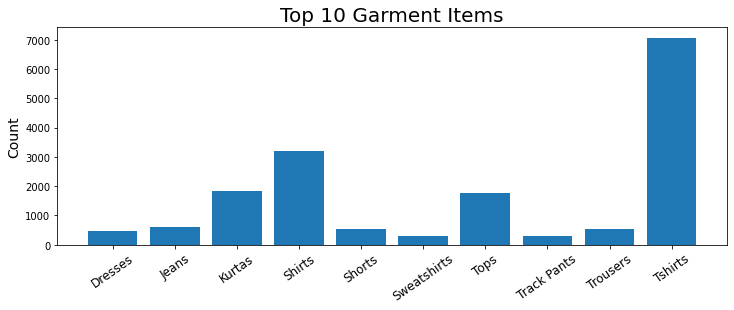

In [ ]:
# plot
items = aa.index
freq = aa['link']
fig = plt.figure(figsize=(12,4))
plt.bar(items, freq)
plt.title('Top 10 Garment Items', size = 20)
plt.ylabel('Count', size = 14)
# plt.xlabel('Garment Type', size = 14)
plt.xticks(size = 12, rotation=35)
plt.show()